In [6]:
from util import load_json, save_json
from spotipy_client import SpotipyClient
import matplotlib.pyplot as plt

client = SpotipyClient()

In [8]:
liked_songs = load_json('liked_songs.json')
track_information = load_json('track_information.json')
artists_info = load_json('artist_info.json')

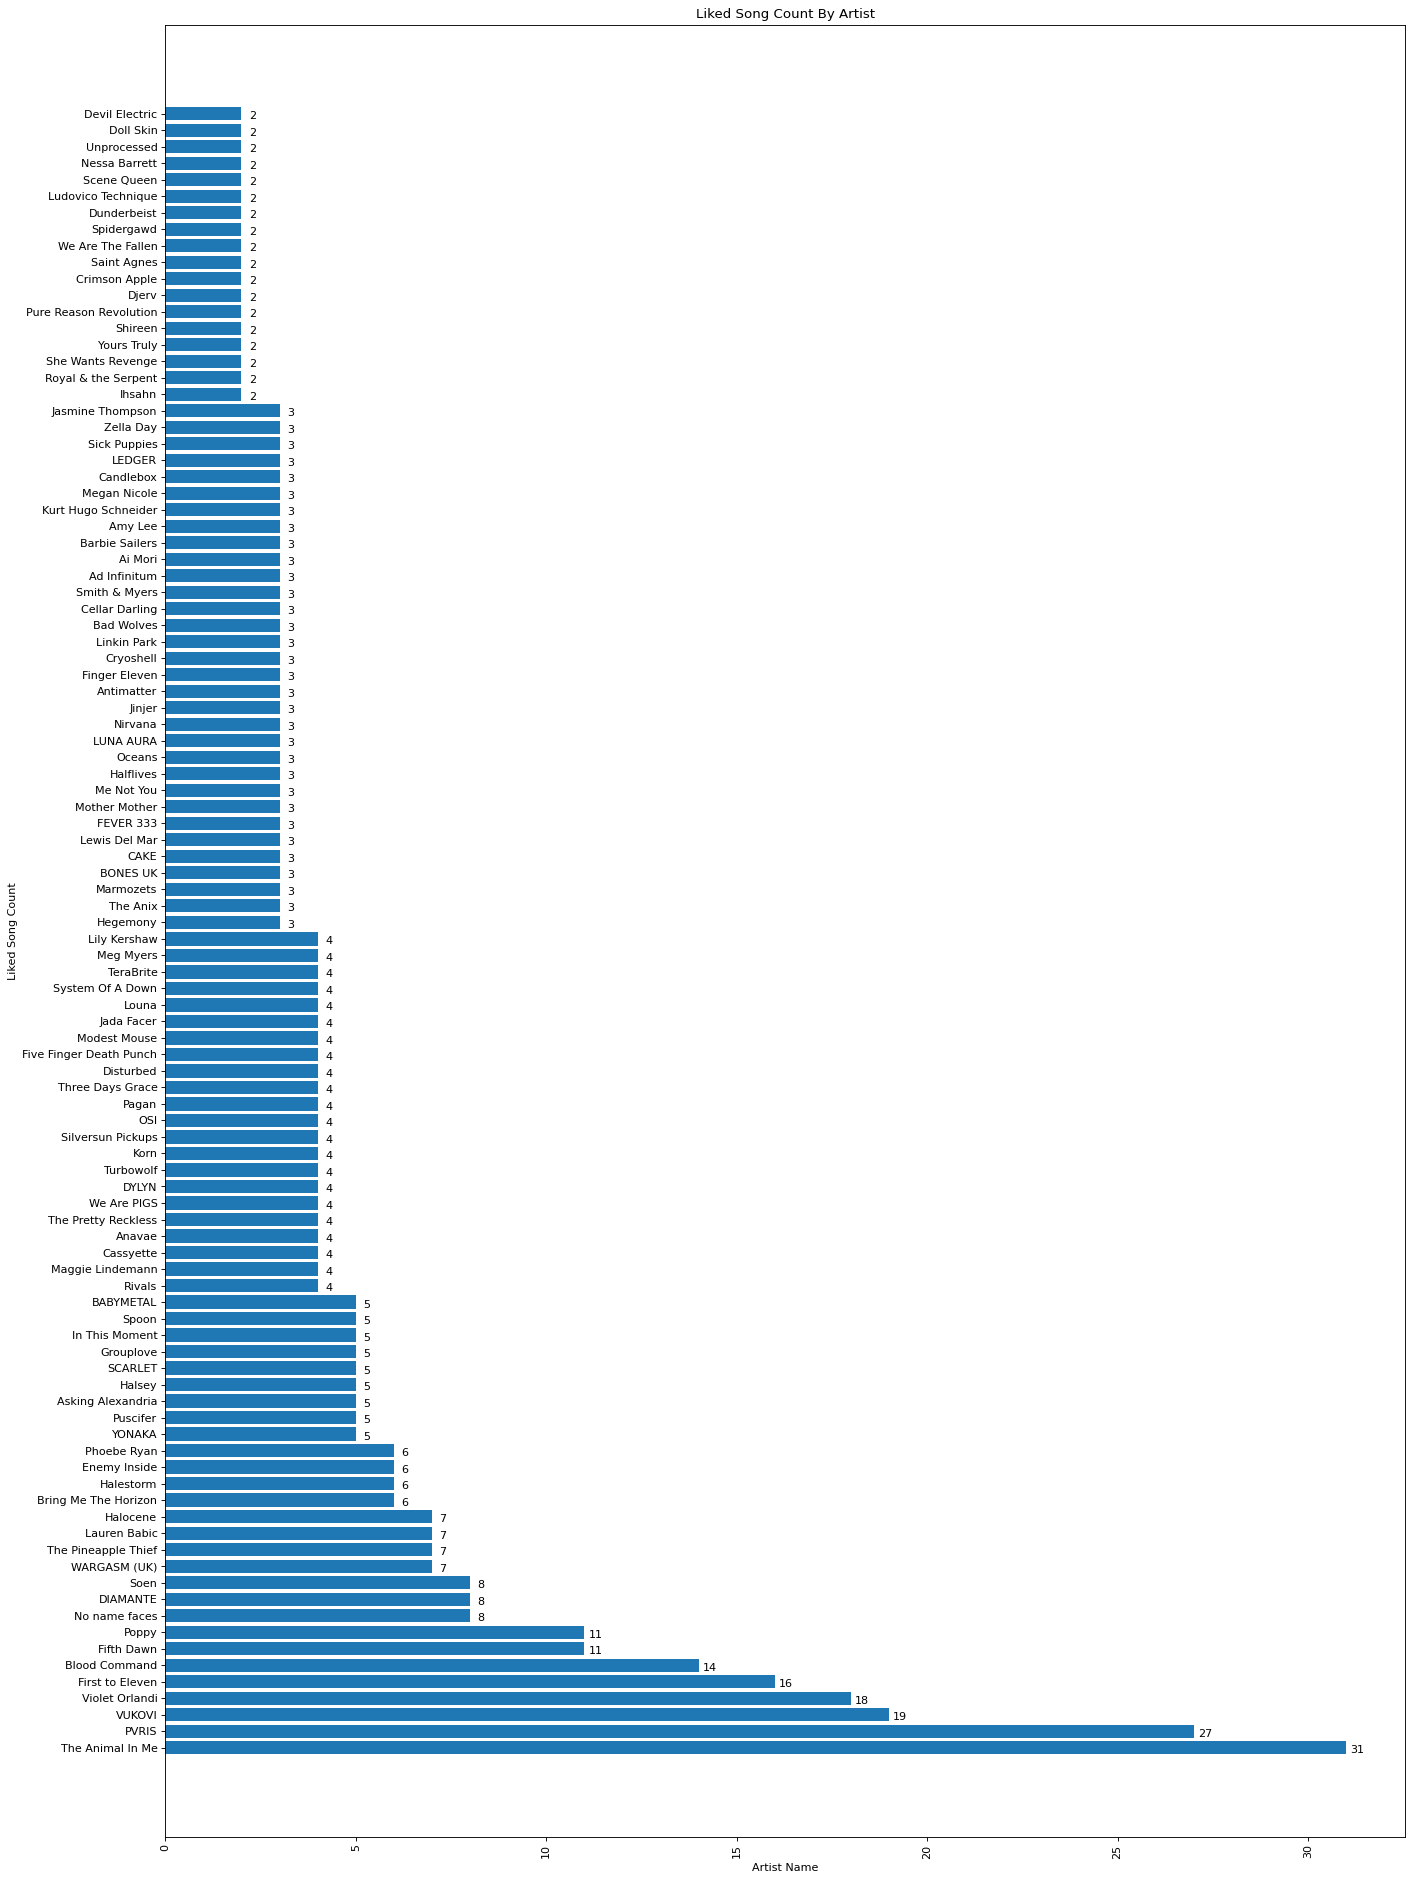

In [53]:
like_count_by_artist = {}
for song in liked_songs:
    track = track_information[song['trackId']]
    for artist in track['artists']:
        name = artist['name']
        if name not in like_count_by_artist:
            like_count_by_artist[name] = 0
        like_count_by_artist[name] += 1

lcba_sorted = {k: v for k, v in sorted(like_count_by_artist.items(), key=lambda item: item[1], reverse=True)}
lcba_x = list(lcba_sorted.keys())[:100]
lcba_y = list(lcba_sorted.values())[:100]

plt.figure(figsize=(20, 30), dpi=80)
plt.barh(lcba_x, lcba_y)
plt.title('Liked Song Count By Artist')
plt.xticks(rotation='vertical')
plt.xlabel('Artist Name')
plt.ylabel('Liked Song Count')


for x, y in zip(lcba_x, lcba_y):
    plt.annotate(str(y), (y, x), textcoords="offset points", xytext=(10, -5), ha='center')

plt.show()
